In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL
import cv2
import time
from keras.datasets import mnist
from keras.models import load_model
import tensorflow as tf

#將MNIST 手寫數字資料讀進來
mnist = tf.keras.datasets.mnist

# mnist 的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的值從 Int 轉成 floating point 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28
# 開始搭建model
# 利用 "Sequential" 把每層 layer 疊起來

# input 大小為 28 x 28

# 最後的 Dense(10) 且 activation 用 softmax
# 代表最後 output 為 10 個 class （0~9）的機率
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(13, 21)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# model每層定義好後需要經過compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

60000
(28, 28)
Epoch 1/5


ValueError: in user code:

    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 273 but received input with shape [32, 784]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


ValueError: in user code:

    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\ianyang\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 273]


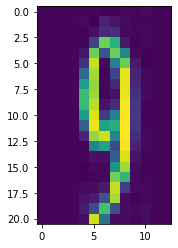

In [3]:
cap = cv2.VideoCapture("9.jpg")#開啟相機

while(True):
    tStart = time.time() #計時開始
    ret,frame = cap.read()#捕獲一幀影象
    if ret:
        cv2.imshow('frame',frame)
        cv2.waitKey(0)
    else:
        break
    img_2 = frame[200:220,230:260]
    #img_11 = frame[50:68,101:113]
    #img_12 = frame[50:68,114:126]
    #img_13 = frame[50:68,127:139]
    #img_14 = frame[50:68,140:152]
    #img_15 = frame[50:68,321:334]
    #img_16 = frame[50:68,335:347]
    #img_17 = frame[50:68,348:360]
    #img_18 = frame[50:68,374:386]
    #img_19 = frame[50:68,387:399]
    #img_20 = frame[50:68,464:476]
    #img_21 = frame[50:68,477:489]
    #img_22 = frame[50:68,490:502]
    cv2.imshow('Camera',img_2)
    #cv2.imshow('Camera11',img_11)
    #cv2.imshow('Camera12',img_12)
    #cv2.imshow('Camera13',img_13)
    #cv2.imshow('Camera14',img_14)
    #cv2.imshow('Camera15',img_15)
    #cv2.imshow('Camera16',img_16)
    #cv2.imshow('Camera17',img_17)
    #cv2.imshow('Camera18',img_18)
    #cv2.imshow('Camera19',img_19)
    #cv2.imshow('Camera20',img_20)
    #cv2.imshow('Camera21',img_21)
    #cv2.imshow('Camera22',img_22)
    
    img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    img_3 = 255-img_2_gray
    img_3 = img_3.astype('float32')
    img_3_min = np.amin(img_3)
    img_4 = img_3 - np.amin(img_3)
    img_5 = 255 * img_4 / (np.amax(img_4))
    kernel = np.ones((5,5),np.uint8)
    img_6 = cv2.erode(img_5,kernel,iterations = 0)
    dilation = cv2.dilate(img_6, kernel, iterations = 0)
    img_25 = cv2.resize(dilation,(480,480),1)
    img_7 = cv2.resize(dilation,(13,21),1)
    img_8 = img_25.astype('uint8')
    plt.imshow(img_7)
    cv2.imshow('input',img_8)
    #print(img_2.shape)
    #print(img_7.dtype, img_8.shape)

    x_test_image = np.reshape(img_7, (1,13,21))
    #print(img_7.dtype, img_7.shape)
    #print(x_test_image.dtype, x_test_image.shape)
    #print(np.amax(x_test_image))
    #print(np.amin(x_test_image))

    # convert 2-D 28x28 image to 4-D nx28x28x1  array
    x_Test4D=x_test_image.reshape(x_test_image.shape[0],13,21,1).astype('float32')
    # normalize the image numbers to 0~1
    x_Test4D_normalize = (x_Test4D / np.amax(x_test_image))
    #print(x_Test4D_normalize.shape)
    prediction=model.predict_classes(x_Test4D_normalize)


    filename = '%s%d%s' % ('./numbers/number_', prediction, '.jpg')
    img_9 = cv2.imread(filename)
    img_10 = cv2.resize(img_9,(480,480),1)
    cv2.imshow('inference',img_10)
    tEnd = time.time() #計時結束

    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.imwrite('output.jpg', img_2)
        break

cap.release()
cv2.destroyAllWindows()

print('It takes %f sec for each frame' % (tEnd - tStart))